Импорты

In [1]:
from sklearn import datasets
from sklearn.utils import Bunch
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Загрузка датасета и демонстрация его ключей

In [2]:
iris: Bunch = datasets.load_iris()  # загрузка датасета
iris.keys()  # ключи к датасету

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Создание датафрейма из датасета: данные из датасета под ключами 'data' и 'target' объединяются в один массив, после чего создается датафрейм с колонками 'feature_names' и 'target' (последнее -- название колонки с целевыми значениями, а именно числовое представление названия цветка)

In [3]:
iris: DataFrame = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)

Демонстрация первых 5 строк датафрейма

In [4]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Добавление колонки с названиями цветков

In [5]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("Setosa")
    elif iris['target'][i] == 1:
        species.append('Versicolor')
    else:
        species.append('Virginica')

iris['species'] = species

In [6]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,Setosa
1,4.9,3.0,1.4,0.2,0.0,Setosa
2,4.7,3.2,1.3,0.2,0.0,Setosa
3,4.6,3.1,1.5,0.2,0.0,Setosa
4,5.0,3.6,1.4,0.2,0.0,Setosa


Группировка видов

In [7]:
iris.groupby('species').size()

species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

Описание статистики данных

In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Построение графика соотношений измерений лепестков

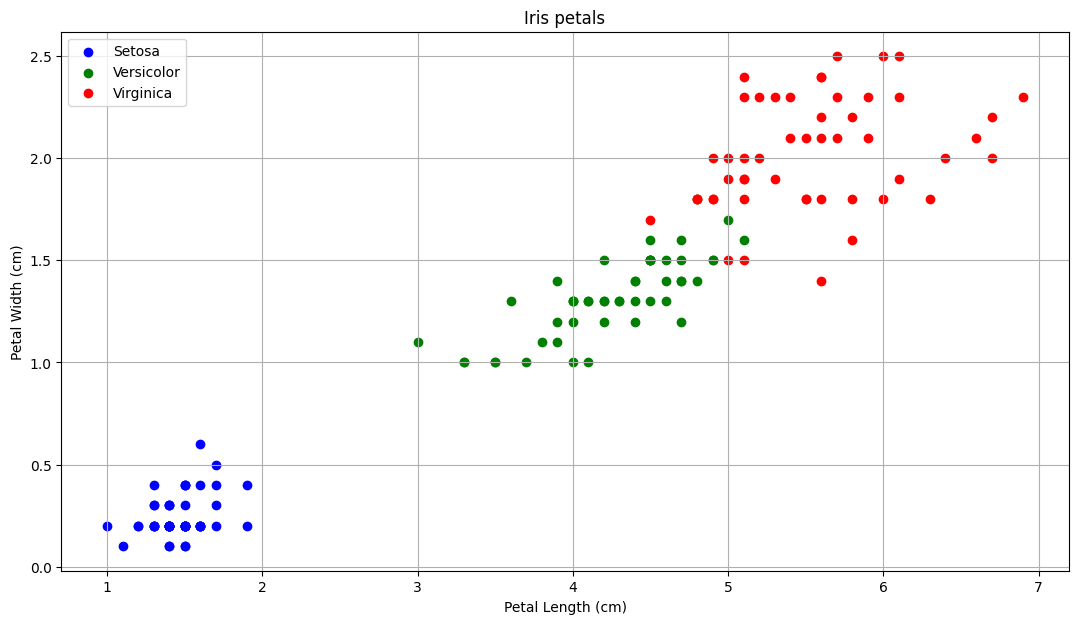

In [9]:
setosa = iris[iris.species == 'Setosa']
versicolor = iris[iris.species == 'Versicolor']
virginica = iris[iris.species == 'Virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label='Setosa', facecolors='blue')
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label='Versicolor', facecolors='green')
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label='Virginica', facecolors='red')

ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.grid()
ax.set_title('Iris petals')
ax.legend()

Построение графика соотношений измерений чашелистиков

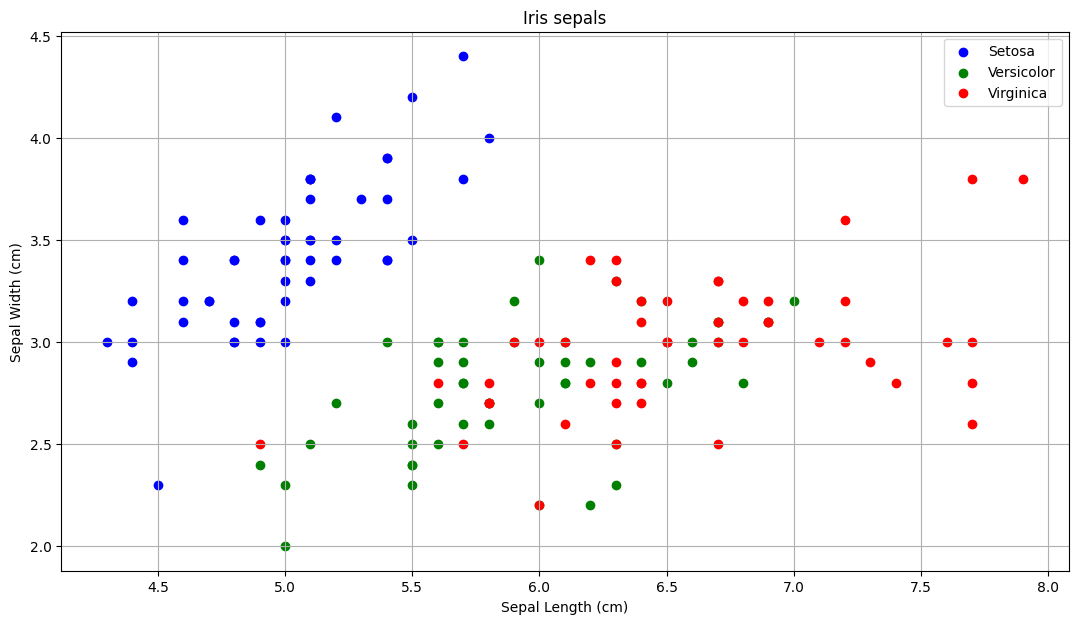

In [10]:
setosa = iris[iris.species == 'Setosa']
versicolor = iris[iris.species == 'Versicolor']
virginica = iris[iris.species == 'Virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

ax.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], label='Setosa', facecolors='blue')
ax.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], label='Versicolor', facecolors='green')
ax.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], label='Virginica', facecolors='red')

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.grid()
ax.set_title('Iris sepals')
ax.legend()

Вывод из визуализации данных: корректнее проводить классификацию по лепесткам, так как они более различимы, чем чашелистики, размеры которых сложно сгруппировать в непересекающиеся классы. 

Разделение данных на обучающую и тестовую выборки. Преобразование данных в массивы NumPy

In [11]:
X = iris.drop(['target','species'], axis=1)
# converting into numpy array and assigning petal length and petal width
X = X. to_numpy ()[:, (2,3)]
y = iris['target']
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

Обучение модели методом логистической регрессии

In [12]:
log_reg = LogisticRegression()
log_reg.fit (X,y) 

LogisticRegression()

Получение предсказаний для обучающей выборки

In [13]:
training_predictions = log_reg.predict(X_train)
training_predictions

array([1., 2., 1., 0., 1., 2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 1., 2.,
       2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0.,
       1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1.,
       2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 0., 1., 1., 0., 1., 2.])

Получение предсказаний для тестовой выборки

In [14]:
test_prediction = log_reg.predict(X_test)
test_prediction

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

In [15]:
y_test

73     1.0
18     0.0
118    2.0
78     1.0
76     1.0
      ... 
113    2.0
33     0.0
138    2.0
101    2.0
62     1.0
Name: target, Length: 75, dtype: float64

In [16]:
print("Precision, Recall, Confusion matrix, in training\n")
# Precision Recall scores
print (metrics. classification_report(y_train, training_predictions, digits=3))
# Confusion matrix
print (metrics. confusion_matrix(y_train, training_predictions))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        21
         1.0      0.923     0.889     0.906        27
         2.0      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75

[[21  0  0]
 [ 0 24  3]
 [ 0  2 25]]
